# Pandas Practice Exercises

This notebook contains 40+ exercises to practice your Pandas skills. The exercises start from the basics and gradually increase in difficulty.

## Datasets Used
We will use a few common datasets available online. You can load them directly using the URLs provided in the exercises.
1. **Chipotle**: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv`
2. **Drinks**: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv`
3. **Titanic**: `https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv`

---

## Section 1: Getting Started & Basic Data Structures


In [86]:
# 1. Import pandas as pd and numpy as np
import pandas as pd
import numpy as np


In [87]:
# 2. Print the version of pandas that has been imported.
pd.__version__


'2.2.3'

In [88]:
# 3. Create a pandas Series from the following list:
data = [10, 20, 30, 40, 50]
# Your code here
series = pd.Series(data)
# they are also 0-indexed like arrays
print(series)

0    10
1    20
2    30
3    40
4    50
dtype: int64


In [89]:
# 4. Create a DataFrame from the following dictionary:
data_dict = {
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'age': [25, 30, 35, 40],
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}
# Your code here
df = pd.DataFrame(data_dict)
print(df)


      name  age         city
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
3    David   40      Houston


In [90]:
# 5 Set the 'name' column as the index of the DataFrame created in Q4.
df.set_index('name', inplace=True)
print(df)

         age         city
name                     
Alice     25     New York
Bob       30  Los Angeles
Charlie   35      Chicago
David     40      Houston


---
## Section 2: Loading Data & Basic Exploration
For this section, we will use the **Chipotle** dataset.
URL: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv`
*Note: This file is tab-separated.*


In [91]:
# 6. Load the dataset into a variable called `chipo`.
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
# Your code here
chipo = pd.read_csv(url, sep='\t')
chipo.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [92]:
# 7. Show the first 10 entries of the dataframe.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [93]:
# 8. What is the number of observations (rows) and columns in the dataset?
chipo.shape


(4622, 5)

In [94]:
# 9. Print the name of all the columns.
chipo.columns


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [95]:
# 10. How is the dataset indexed?
chipo.index

# 0 indexed, 4622 rows and 5 columns

RangeIndex(start=0, stop=4622, step=1)

---
## Section 3: Data Cleaning & Manipulation
Continue using the `chipo` dataframe.


In [96]:
# 11. Check the data type of each column.
chipo.dtypes


order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [97]:
# 12. The 'item_price' column is currently an object (string) because of the '$' sign.
# Clean this column: remove the '$' and convert it to a float.
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)


In [98]:
# 13. Are there any missing values in the dataset? Check for nulls.
chipo.isnull().sum()


order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [99]:
# 14. Drop any duplicate rows, if they exist.
chipo.drop_duplicates(inplace=True)
chipo.shape

(4563, 5)

In [100]:
# 15. Create a new column 'revenue' which is the product of 'quantity' and 'item_price'.
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo.head()


,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


---
## Section 4: Filtering & Sorting


In [101]:
# 16. Sort the dataframe by 'item_price' in descending order.
chipo.sort_values(by='item_price', ascending=False, inplace=True)
chipo.head()


,order_id,quantity,item_name,choice_description,item_price,revenue
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25,105.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00,140.00
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00,140.00
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75,101.25


In [102]:
# 17. How many items cost more than $10.00?
chipo[chipo['item_price'] > 10].shape[0]


1123

In [103]:
# 18. What is the price of each item? 
# (Hint: print a dataframe with only two columns: item_name and item_price, drop duplicates)
chipo[['item_name', 'item_price']].drop_duplicates()


,item_name,item_price
3598,Chips and Fresh Tomato Salsa,44.25
3480,Carnitas Bowl,35.25
3602,Chicken Burrito,35.00
3601,Veggie Burrito,33.75
409,Chicken Bowl,32.94
...,...,...
70,Side of Chips,1.69
3460,Bottled Water,1.50
4430,Canned Soft Drink,1.25
3793,Canned Soda,1.09


In [104]:
# 19. Select only the items where the name is 'Chicken Bowl'.
chipo[chipo['item_name'] == 'Chicken Bowl'].head()

,order_id,quantity,item_name,choice_description,item_price,revenue
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94,98.82
1514,616,3,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",26.25,78.75
1429,578,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Sour Cream, Guacam...",22.50,45.00
2510,997,2,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",22.50,45.00
4423,1764,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",22.50,45.00


In [105]:
# 20. Select items where the name is 'Chicken Bowl' AND the quantity is greater than 1.
chipo[(chipo['item_name'] == 'Chicken Bowl') & (chipo['quantity'] > 1)].head()

,order_id,quantity,item_name,choice_description,item_price,revenue
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94,98.82
1514,616,3,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",26.25,78.75
1429,578,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Sour Cream, Guacam...",22.50,45.00
2510,997,2,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",22.50,45.00
4423,1764,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",22.50,45.00


---
## Section 5: Aggregation & Grouping
For this section, we will use the **Drinks** dataset.
URL: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv`


In [106]:
# 21. Load the drinks dataset into a variable called `drinks`.
url_drinks = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
# Your code here
drinks = pd.read_csv(url_drinks)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [107]:
# 22. Which continent drinks more beer on average?
drinks.groupby('continent')['beer_servings'].mean().idxmax()


'EU'

In [108]:
# 23. For each continent, print the statistics for wine consumption.
drinks.groupby('continent')['wine_servings'].describe()


,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [109]:
# 24. Print the mean alcohol consumption per continent for every column.
drinks.groupby('continent').mean(numeric_only=True)
drinks.groupby('continent').sum(numeric_only=True)


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,3258,866,862,159.4
AS,1630,2677,399,95.5
EU,8720,5965,6400,387.8
OC,1435,935,570,54.1
SA,2101,1377,749,75.7


In [110]:
# 25. Print the median alcohol consumption per continent for every column.
drinks.groupby('continent').median(numeric_only=True)


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


---
## Section 6: Apply & Advanced Selection
Back to the `chipo` dataset


In [111]:
# 26. Create a function that returns "High" if a price is > 10 and "Low" otherwise.
# Apply this function to the 'item_price' column of `chipo` and create a new column 'price_level'.
def price_level(price):
    if price > 10:
        return "High"
    else:
        return "Low"

chipo['price_level'] = chipo['item_price'].apply(price_level)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,revenue,price_level
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75,High
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25,105.75,High
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00,140.00,High
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00,140.00,High
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75,101.25,High


In [112]:
# 27. Use the `apply` method to capitalize all strings in the 'item_name' column.
def capitalize_item_name(item_name):
    return item_name.capitalize()

chipo['item_name'] = chipo['item_name'].apply(capitalize_item_name)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,revenue,price_level
3598,1443,15,Chips and fresh tomato salsa,NaN,44.25,663.75,High
3480,1398,3,Carnitas bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25,105.75,High
3602,1443,4,Chicken burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00,140.00,High
1254,511,4,Chicken burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00,140.00,High
3601,1443,3,Veggie burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75,101.25,High


In [113]:
# 28. Select only the rows from index 10 to 20 (inclusive) and columns 1 to 3.
chipo.iloc[10:21, 0:3]


,order_id,quantity,item_name
1514,616,3,Chicken bowl
3334,1336,3,Steak bowl
613,253,2,Steak salad bowl
281,123,2,Steak salad bowl
506,212,2,Carnitas bowl
1753,708,2,Steak burrito
4427,1764,2,Steak bowl
3754,1502,2,Steak bowl
1566,635,2,Steak bowl
4307,1718,2,Steak bowl


---
## Section 7: Merging & Joining


In [114]:
# 29. Create two dataframes:
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [2, 3, 4], 'Score': [85, 90, 95]})

# Merge them on 'ID' using an inner join.
df1.merge(df2, on='ID', how='inner')


,ID,Name,Score
0,2,Bob,85
1,3,Charlie,90


In [115]:
# 30. Merge them on 'ID' using an outer join.
df1.merge(df2, on='ID', how='outer')

,ID,Name,Score
0,1,Alice,NaN
1,2,Bob,85.0
2,3,Charlie,90.0
3,4,NaN,95.0


In [116]:
# 31. Merge them on 'ID' using a left join (keep all from df1)
df1.merge(df2, on='ID', how='left')


,ID,Name,Score
0,1,Alice,NaN
1,2,Bob,85.0
2,3,Charlie,90.0


---
## Section 8: Time Series
For this section, let's generate some time series data.


In [117]:
# 32. Create a date range from '2023-01-01' to '2023-01-10'.
pd.date_range(start='2023-01-01', end='2023-01-10')


DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')

In [118]:
# 33. Create a DataFrame with this date range as the index and a column 'Sales' with random values.
df = pd.DataFrame({'Sales': np.random.randint(100, 1000, size=10)}, index=pd.date_range(start='2023-01-01', end='2023-01-10'))


In [119]:
# 34. Resample the data to calculate the 3-day sum of sales.
df.resample('3D').sum()


,Sales
2023-01-01,1948
2023-01-04,2109
2023-01-07,1536
2023-01-10,495


In [120]:
# 35. Shift the 'Sales' column by 1 day (create a lag column)
df['Sales_Lag'] = df['Sales'].shift(1)


---
## Section 9: Titanic Dataset - Mixed Practice
URL: `https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv`


In [121]:
# 36. Load the Titanic dataset.
url_titanic = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
# Your code here
titanic = pd.read_csv(url_titanic)


In [122]:
# 37. How many passengers survived? (Survived=1)
titanic['Survived'].sum()


np.int64(342)

In [123]:
# 38. What is the average age of passengers?
titanic['Age'].mean()


np.float64(29.69911764705882)

In [124]:
# 39. Group by 'Pclass' and calculate the survival rate (mean of 'Survived').
titanic.groupby('Pclass')['Survived'].mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [125]:
# 40. Fill missing values in the 'Age' column with the median age.
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


/var/folders/hd/f4hrkdg95y97wjwq1_hpdx5r0000gn/T/ipykernel_98893/2800220854.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [126]:
# 41. Create a pivot table showing the average age by 'Sex' and 'Pclass'.
titanic.pivot_table(values='Age', index='Sex', columns='Pclass', aggfunc='mean')


Pclass,1,2,3
Sex,,,
female,33.978723,28.703947,23.572917
male,38.995246,30.512315,26.911873


---
## Section 10: Visualization (Optional)
Requires matplotlib/seaborn


<Axes: >

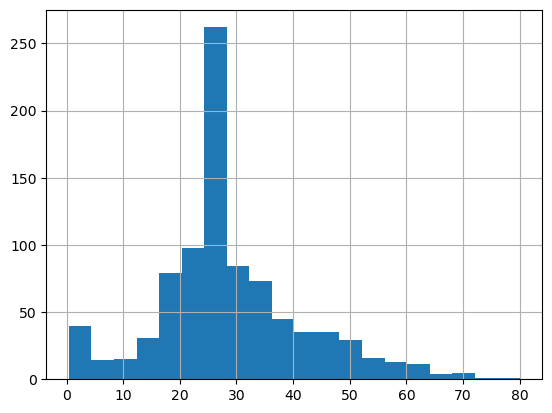

In [127]:
# 42. Plot a histogram of the 'Age' column from the Titanic dataset.
titanic['Age'].hist(bins=20)



<Axes: xlabel='Pclass'>

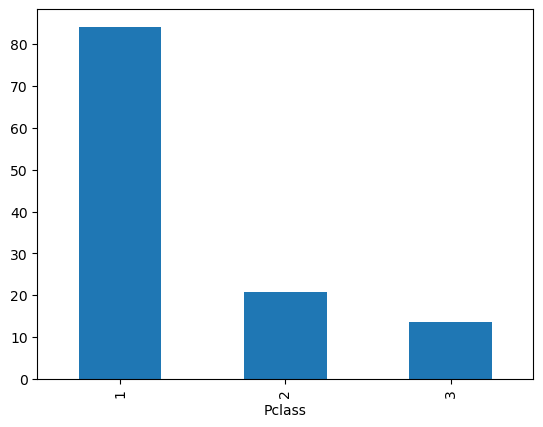

In [128]:
# 43. Plot a bar chart of the average fare by Pclass.
titanic.groupby('Pclass')['Fare'].mean().plot(kind='bar')


---
## Great Job!
You've covered the basics of Pandas including creating objects, reading data, cleaning, filtering, grouping, merging, and time series.
